<a href="https://colab.research.google.com/github/juanBIMMUNE/GravityML/blob/master/GravityML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ERROR REDUVIBLE VS IRREDUCIBLE EN EL MOVIMIENTO VERTICAL**



![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/NASA_logo.svg/200px-NASA_logo.svg.png)




## **PREPARA TUS HERRAMIENTAS**

In [145]:
#MANIPULACIÓN DE DATOS
import numpy as np
import pandas as pd

#VISUALIZACIÓN
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


#ALGORITMOS ML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split  

## **PRIMER EXPERIMENTO: CÁMARA DE VACÍO ENCENDIDA**



* Solicitamos a nuestros compañeros que ejecuten un set de tests con la **cámara de vacío encendida**. 

* Todos los diferentes objetos se dejarán caer desde la misma altura: **200m**.

Veamos que sucede...

In [122]:
#DATASET GENERADO
samples_on = dataset_generator(1,50,20)

### **EXPLORAMOS LOS DATOS**



**Vamos a ver qué aspecto tienen los datos recabados**

In [123]:
samples_on.head(10)

,ID,Z,T,DRAG,MASS,AREA
0,Object0,199.999118,0.013420,0.822978,5,0.125
1,Object0,191.808907,1.292924,0.822978,5,0.125
2,Object0,10.743646,6.214801,0.822978,5,0.125
3,Object0,177.394739,2.147864,0.822978,5,0.125
4,Object0,115.628633,4.149536,0.822978,5,0.125
5,Object0,183.669442,1.825587,0.822978,5,0.125
6,Object0,14.015711,6.160842,0.822978,5,0.125
7,Object0,90.111581,4.735632,0.822978,5,0.125
8,Object0,177.502617,2.142733,0.822978,5,0.125
9,Object0,70.218895,5.146449,0.822978,5,0.125


**ID** = identificador del objeto lanzado

**Z** = altura del objeto en un determinado tiempo

**T** = tiempo que ha pasado desde que se ha dejado caer el objeto y se ha 
realizado la medición

**DRAG** = coeficiente de rozamiento

**Podemos también revisar las características de las diferentes columnas:**

In [124]:
samples_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   object 
 1   Z       1000 non-null   float64
 2   T       1000 non-null   float64
 3   DRAG    1000 non-null   float64
 4   MASS    1000 non-null   int64  
 5   AREA    1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 54.7+ KB


**Podemos ahora tratar de entender cómo se distribuyen los datos:**

In [125]:
samples_on.describe()

,Z,T,DRAG,MASS,AREA
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000
mean,128.157892,3.315851,1.033155,5.0,0.125
std,63.544115,1.915844,0.303623,0.0,0.000
min,-6.415379,0.000479,0.171849,5.0,0.125
25%,77.180859,1.683811,0.848998,5.0,0.125
50%,145.070425,3.348151,1.055535,5.0,0.125
75%,186.107358,5.006509,1.161167,5.0,0.125
max,199.999999,6.490423,1.806821,5.0,0.125


**Una imagen vale más que mil palabras:**

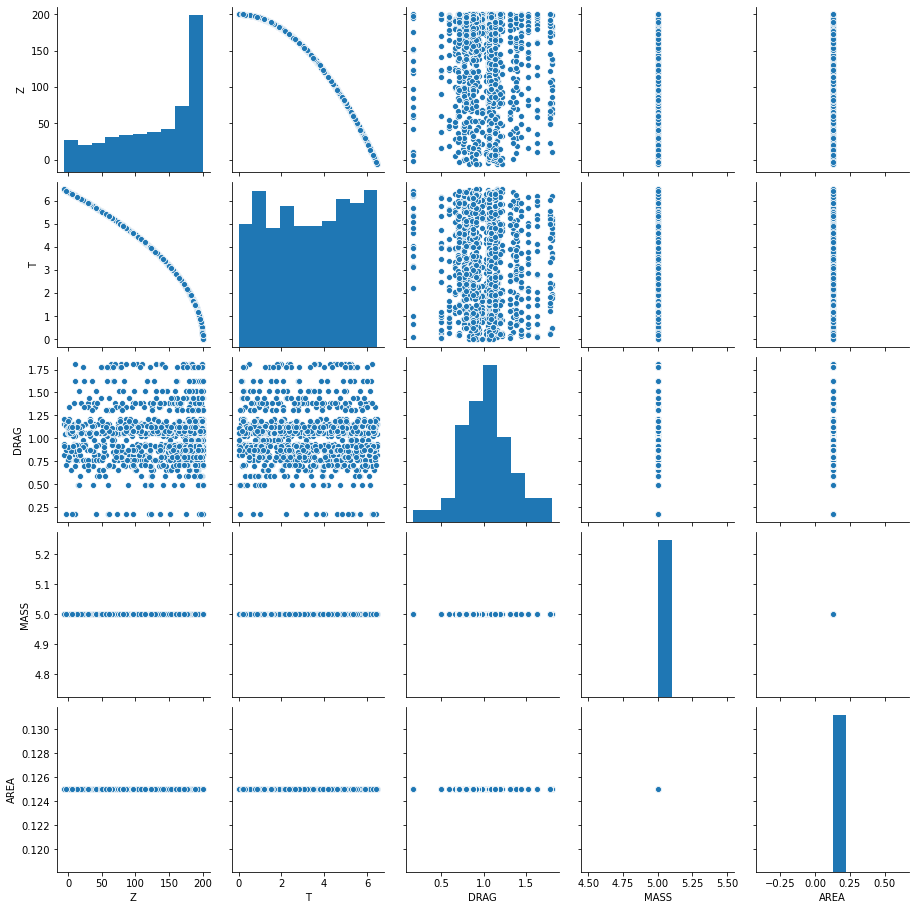

In [126]:
sns.pairplot(data=samples_on);

Ponemos foco en la relación altura tiempo:

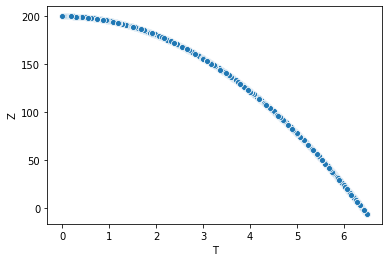

In [127]:
sns.scatterplot('T','Z',data=samples_on);

Comparamos ahora el comportamiento de diferentes objetos:

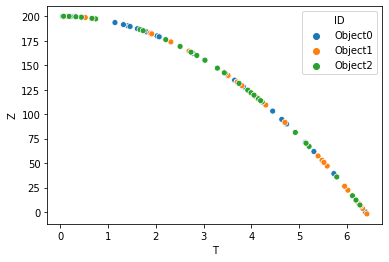

In [128]:
sns.scatterplot('T','Z',data=dataset_generator(1,3,30),hue='ID');

### **GENERAMOS UN PRIMER MODELO LINEAL**

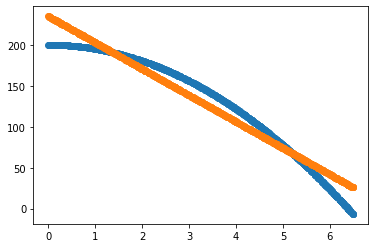

In [129]:
# Inicializo mi modelo de regresión
lm = LinearRegression()

#Identifico mis variables de entrada/salida
X_lm = samples_on[['T']]
y_lm = samples_on['Z']

#Entreno mi modelo
lm.fit(X_lm, y_lm)

#Utilizo los mismos datos de entrenamiento para ver qué tal se comporta mi modelo
lm_predictions = lm.predict(X_lm)
plt.scatter(samples_on[['T']],y_lm)
plt.scatter(samples_on[['T']],lm_predictions)

Claramente un modelo lineal no se adapta al fenómeno estudiado.

### **GENERAMOS UN SEGUNDO MODELO NO LINEAL**

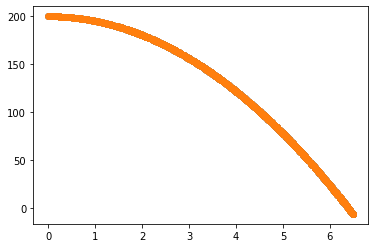

In [130]:
#Creo una nueva columna con el cuadrado de los tiempos
samples_on['T2'] = samples_on['T']**2

# Inicializo mi modelo de regresión
pm_2 = LinearRegression()

#Identifico mis variables de entrada/salida
X_pm_2 = samples_on[['T','T2']]
y_pm_2 = samples_on['Z']

#Entreno mi modelo
pm_2.fit(X_pm_2, y_pm_2)

#Utilizo los mismos datos de entrenamiento para ver qué tal se comporta mi modelo
pm_2_predictions = pm_2.predict(X_pm_2)
plt.scatter(samples_on[['T']],y_pm_2)
plt.scatter(samples_on[['T']],pm_2_predictions)

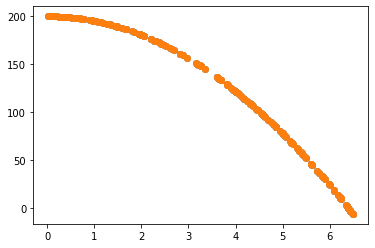

In [131]:
# Inicializo mi modelo de regresión
pm_2_split = LinearRegression()

#Identifico mis variables de entrada/salida
X_pm_2_train, X_pm_2_test, y_pm_2_train, y_pm_2_test = train_test_split(samples_on[['T','T2']], samples_on['Z'], test_size=0.2)

#Entreno mi modelo
pm_2_split.fit(X_pm_2_train, y_pm_2_train)

#Utilizo los mismos datos de entrenamiento para ver qué tal se comporta mi modelo
pm_2_split_predictions = pm_2.predict(X_pm_2_test)
plt.scatter(X_pm_2_test['T'], y_pm_2_test)
plt.scatter(X_pm_2_test['T'], pm_2_split_predictions)

### **¿TIENEN SENTIDO ESTOS RESULTADOS?**

In [132]:
#PUNTO DE CORTE
print("Intercept: ",pm_2.intercept_)

#COEFFICIENTES
cdf = pd.DataFrame(pm_2.coef_,[['T','T2']],columns=['Coefficients'])
cdf

Intercept:  200.0


,Coefficients
T,-1.297678e-14
T2,-4.900000e+00



**Busquemos un libro...**

La fórmula física que define la ubicación de un objeto que se mueve verticalmente es:

$z=z_{0}+v_{0}t+\frac{1}{2}at^2$ 

donde:

> $t$ el tiempo para el cual deseamos conocer la posición del objeto

> $z_{0}$ la altura del objeto cuando iniciamos el cronómetro

> $v_{0}$ la velocidad del objeto cuando inicialmos el cronómetro 

> $a$ la aceleración del objeto cuando iniciamos el cronómetro

> $z$ la posición del objeto para el tiempo deseado

Cuando nos encontramos en el vacío:     $a=a_g=-9.8m/s^2$



**Algunas cuestiones:**


*   ¿Cuál ha sido el tipo de error generado en el primer modelo frente al segundo?
*   ¿Hay algún tipo de error en el segundo modelo?





## **SEGUNDO EXPERIMENTO: CÁMARA DE VACÍO APAGADA**



Solicitamos ahora realizar exactamente el mismo test pero ahora con la **cámara de vacío apagada**.

Veamos que sucede...

In [133]:
#DATASET GENERADO
samples_off = dataset_generator(0,50,20)

### **EXPLORAMOS LOS DATOS**



**Vamos a ver qué aspecto tienen los datos ahora**

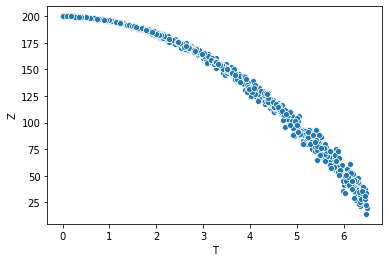

In [134]:
sns.scatterplot('T','Z',data=samples_off);

Comparamos ahora el comportamiento de diferentes objetos:

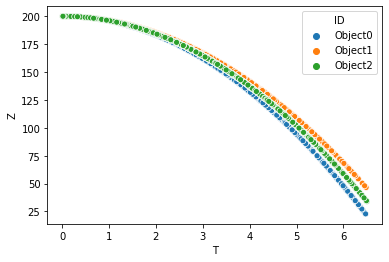

In [135]:
sns.scatterplot('T','Z',data=dataset_generator(0,3,500),hue='ID');

Podemos ver cómo diferentes objetos tienen diferente comportamiento, aún no sabemos muy bien por qué.


### **PROBAMOS ANTERIOR MODELO**

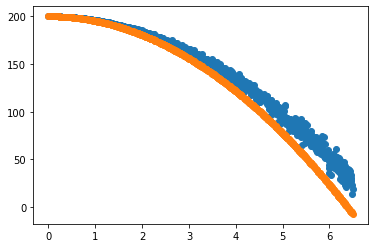

In [136]:
#NUEVOS DATOS
plt.scatter(samples_off['T'],samples_off['Z'])

#PREDICCIÓN PARA DICHOS DATOS
samples_off['T2'] = samples_off['T']**2
X_pm_2_off = samples_off[['T','T2']]
pm_2_predictions_off = pm_2.predict(X_pm_2_off)
plt.scatter(samples_off['T'],pm_2_predictions_off);

Podemos ver como claramente, frente al escenario anterior, los objetos se están desplazando a menor velocidad, el modelo ya no está dando buenos resultados.

### **ENTRENAMOS UN NUEVO MODELO CON EL NUEVO DATASET**

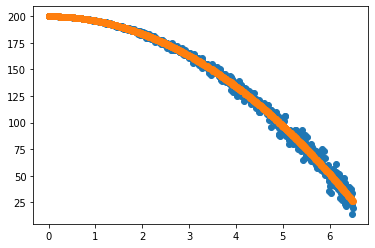

In [137]:
# Inicializo mi modelo de regresión
pm_2_off = LinearRegression()

#Identifico mis variables de entrada/salida
X_pm_2_off = samples_off[['T','T2']]
y_pm_2_off = samples_off['Z']

#Entreno mi modelo
pm_2_off.fit(X_pm_2_off, y_pm_2_off)

#Utilizo los mismos datos de entrenamiento para ver qué tal se comporta mi modelo
pm_2_off_predictions = pm_2_off.predict(X_pm_2_off)
plt.scatter(samples_off[['T']],y_pm_2_off)
plt.scatter(samples_off[['T']],pm_2_off_predictions);

Vemos que el modelo se adapta mejor, pero sigue existiendo ruido en la información que provoca un ligero error, mayor cuando mayor es el tiempo.

### **PROBAMOS CON UN POLINOMIO DE MAYOR GRADO**

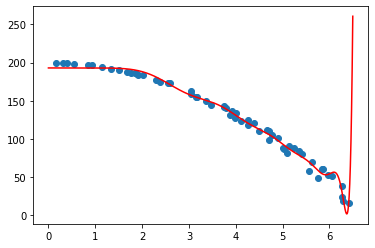

In [138]:
samples_off_small = dataset_generator(0,4,15)

# Inicializo mi modelo de regresión
poly = PolynomialFeatures(degree = 23) #grado 23
pm23 = LinearRegression()

#Identifico mis variables de entrada/salida
X_pm23 = poly.fit_transform(samples_off_small[['T']])
y_pm23 = samples_off_small['Z']

#Entreno mi modelo
pm_2_off.fit(X_pm23, y_pm23)

#Utilizo los mismos datos de entrenamiento para ver qué tal se comporta mi modelo
pm_2_off_drag.fit(X_pm23, y_pm23)
pm_2_off_drag_predictions = pm_2_off_drag.predict(X_pm23)
plt.scatter(samples_off_small[['T']],y_pm23);

#Represento la función generada
x = np.linspace(0, 6.5, 1000).reshape(-1, 1)
xpoly = poly.fit_transform(x)
y = pm_2_off_drag.predict(xpoly)
plt.plot(x,pm_2_off_drag.predict(xpoly),c='r');

Observamos como el modelo empieza a memorizar los puntos en lugar de encontrar una función que generalice el fenómeno.

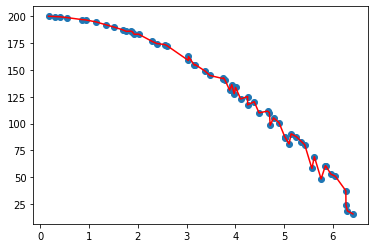

In [139]:
#Caso extremo
samples_ordered = samples_off_small.sort_values('T')
plt.scatter(samples_ordered['T'], samples_ordered['Z'])
plt.plot(samples_ordered['T'], samples_ordered['Z'], 'r')

### **PROBAMOS CON OTRAS VARIABLE QUE EXPLIQUEN EL FENÓMENO**

Tratamos de dar respuesta utilizando como parte del entrenamiento el coeficiente de rozamiento.

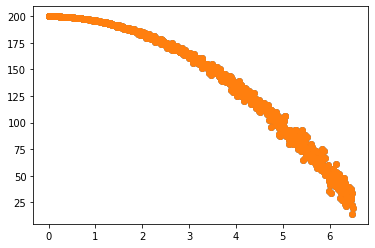

In [140]:
#Creo una nueva columna con el cuadrado de los tiempos
samples_off['T2-DRAG'] = samples_off['T2']*samples_off['DRAG']

# Inicializo mi modelo de regresión
pm_2_off_drag = LinearRegression()

#Identifico mis variables de entrada/salida
X_pm_2_off_drag = samples_off[['T','T2','T2-DRAG']]
y_pm_2_off = samples_off['Z']

#Entreno mi modelo
pm_2_off_drag.fit(X_pm_2_off_drag, y_pm_2_off)

#Utilizo los mismos datos de entrenamiento para ver qué tal se comporta mi modelo
pm_2_off_drag_predictions = pm_2_off_drag.predict(X_pm_2_off_drag)
plt.scatter(samples_off[['T']],y_pm_2_off)
plt.scatter(samples_off[['T']],pm_2_off_drag_predictions);

Vemos un excelente resultado. Podría parecer que el modelo a memorizado los puntos, veámoslo desde otra perspectiva.

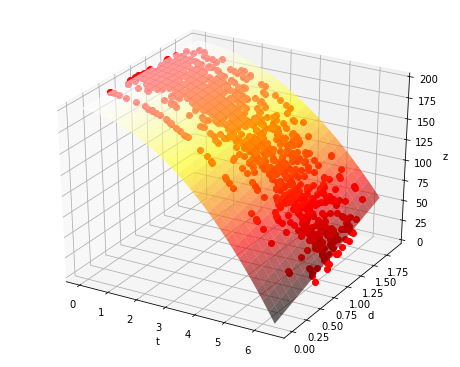

In [141]:
# 3D Plotting
fig = plt.figure(figsize=[8, 6.5]) #bigger
ax = fig.gca(projection='3d')

t_surf=np.arange(0, 6.5, 0.1)                # generate mesh
d_surf=np.arange(0, 2, 0.1)
t_surf, d_surf = np.meshgrid(t_surf, d_surf)

z_surf = pm_2_off_drag.intercept_ + pm_2_off_drag.coef_[0]*t_surf + pm_2_off_drag.coef_[1]*t_surf**2 + pm_2_off_drag.coef_[2]*t_surf**2*d_surf
ax.plot_surface(t_surf, d_surf, z_surf, cmap=cm.hot, alpha=0.6);
ax.set_xlabel('t')
ax.set_ylabel('d')
ax.set_zlabel('z')
ax.plot(samples_off['T'],samples_off['DRAG'],samples_off['Z'],'ro')

**¿TIENEN SENTIDO ESTOS RESULTADOS?**

In [142]:
#Intercept
print("Intercept: ",pm_2_off_drag.intercept_)

#Coefficients
cdf = pd.DataFrame(pm_2_off_drag.coef_,[['T','T2','T2-DRAG']],columns=['Coefficients'])
cdf

Intercept:  200.00000000000006


,Coefficients
T,-1.874903e-14
T2,-4.900000e+00
T2-DRAG,7.227610e-01


**Busquemos un libro...**

$a_F=\frac{\rho A \delta v^2}{2m}=f_f \rho t^2$

Where:

> $\rho$ is the density of the air, in this case: $\rho=1.2041kg/m^3$

> $A$ is the area of the orthogonal section of the object, in this case: $A=0.125m^2$

> $\delta$ is the shape coeficient of the object, for a cube, around 1.05

> $v$ is the velocity of the object, therefore $v=a*t$. Here we assume $a=g$ for the sake of simplicity on the calculations

> $m$ is the mass of the object

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/14ilf1l.svg/400px-14ilf1l.svg.png)

**Algunas cuestiones:**


*   ¿Cuál ha sido el tipo de error generado en cada caso?

## **ANEXOS**


### **GENERADOR DATASET**

Esta funcionalidad nos pemitirá generar nuevos datasets bajo demanda:

In [143]:
#CONSTANTS
Z_0 = 200 #posición cuando t=0 -> siempre dejamos caer los objetos desde esta altura
V_0 = 0 #velocidad cuando t=0 -> los objetos parten a velocidad cero
GRAVITY = -9.8 #m/s2
AIR_DENSITY_VACUUM_ON = 0 #kg/m3
AIR_DENSITY_VACUUM_OFF = 1.2041 #kg/m3
MASS = 5 #kg
DRAG_COEFFICIENT_AVG = 1.05 #cube coefficient
AREA = 0.125 #m2
np.random.seed(0)
default_population_size = 50 #cantidad de objetos
default_checkpoints = 10 #cantidad de puntos de control durante la caída


#F(X) REAL DEL MOVIMIENTO VERTICAL
def object_vertical_location(air_density,drag_coeff,t):
  return Z_0 + t*V_0 + t**2*GRAVITY/2 + t**2*(air_density*AREA*drag_coeff*GRAVITY**2/(2*MASS))/2


#GENERADOR DATASET
def dataset_generator(vacuum=1, population_size=default_population_size, checkpoints=default_checkpoints):
  #Initialize dataset
  dataset = pd.DataFrame(columns=['ID','Z','T','DRAG'])  
  
  #Generamos un coefficiente de rozamiento para cada objeto
  drag_coeffs = np.random.normal(DRAG_COEFFICIENT_AVG, 0.34, population_size)
    
  #Vertical locations
  if vacuum == 1: # Con vacío
    for i in range(0,population_size): #Para cada objeto calculamos su altura en cada checkpoint
      t = np.random.uniform( low=0,high=6.5,size=checkpoints)
      dataset = dataset.append(pd.DataFrame(
          { "ID": np.full((checkpoints,), i, dtype=int),
            "Z": object_vertical_location(AIR_DENSITY_VACUUM_ON,drag_coeffs[i],t), 
            "T":t,
            "DRAG": np.full((checkpoints,), drag_coeffs[i])
            }
          )
      )
  else: # Sin vacío
    for i in range(0,population_size): #Para cada objeto calculamos su altura en cada checkpoint
      t = np.random.uniform( low=0,high=6.5,size=checkpoints)
      dataset = dataset.append(pd.DataFrame(
          { "ID": np.full((checkpoints,), i, dtype=int),
            "Z": object_vertical_location(AIR_DENSITY_VACUUM_OFF,drag_coeffs[i],t), 
            "T":t,
            "DRAG": np.full((checkpoints,), drag_coeffs[i])
            }
          )
      )
  dataset['ID'] = 'Object' + dataset['ID'].astype(str)
  dataset['MASS'] = MASS
  dataset['AREA'] = AREA
  return dataset
